In [182]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import dataset

In [183]:
dt_ad = pd.read_csv("/content/advertising.csv")

In [184]:
dt_ad.shape

(200, 4)

In [185]:
dt_ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
dt_ad.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [ ]:
dt_ad['Sales'].value_counts()

11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: Sales, Length: 121, dtype: int64

In [ ]:
dt_ad['Radio'].value_counts()

4.1     3
5.7     3
13.9    2
14.3    2
36.9    2
       ..
42.8    1
14.5    1
30.6    1
33.0    1
8.6     1
Name: Radio, Length: 167, dtype: int64

In [ ]:
dt_ad['TV'].value_counts()

199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: TV, Length: 190, dtype: int64

In [ ]:
dt_ad.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
dt_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
dt_ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
dt_ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

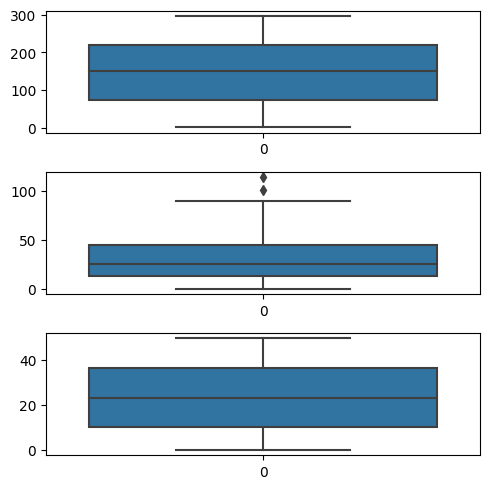

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dt_ad['TV'], ax = axs[0])
plt2 = sns.boxplot(dt_ad['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(dt_ad['Radio'], ax = axs[2])
plt.tight_layout()

In [ ]:
s,s0,r,n=dt_ad['Sales'],dt_ad['TV'],dt_ad['Radio'],dt_ad['Newspaper']


In [ ]:
s0.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

<ipython-input-34-6277e9380c91>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt_ad['Sales'],hist = True)


<Axes: xlabel='Sales', ylabel='Density'>

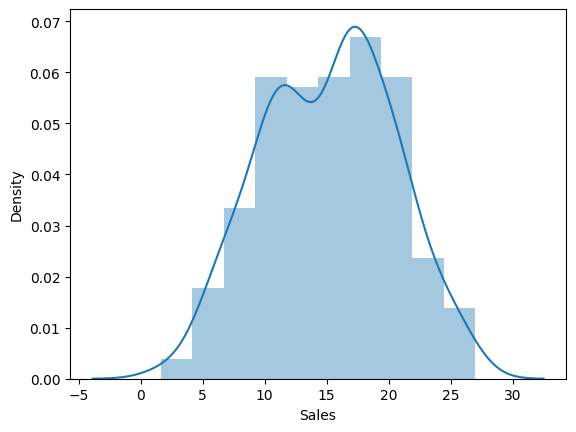

In [ ]:
sns.distplot(dt_ad['Sales'],hist = True)

Text(0, 0.5, 'Sales')

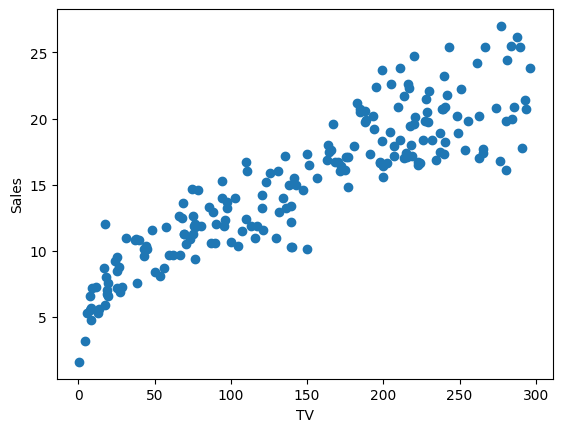

In [ ]:
plt.scatter(s0,s)
plt.xlabel('TV')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

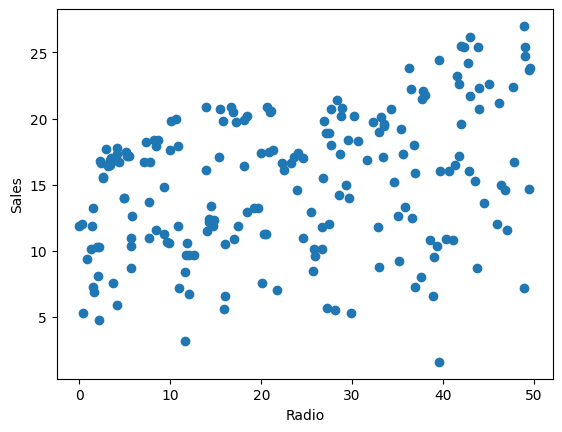

In [ ]:
plt.scatter(r,s)
plt.xlabel('Radio')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

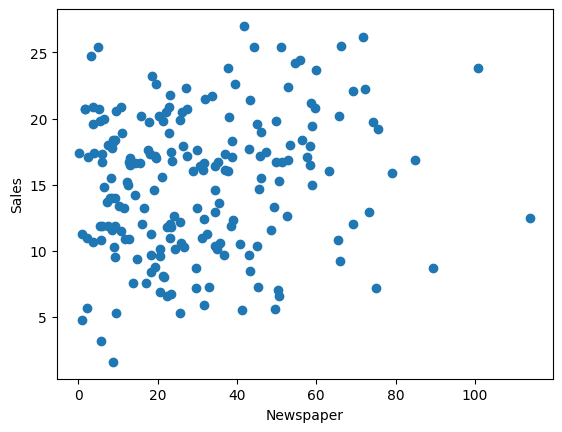

In [ ]:
plt.scatter(n,s)
plt.xlabel('Newspaper')
plt.ylabel('Sales')

# the relationship between the features and the target using scatterplots

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


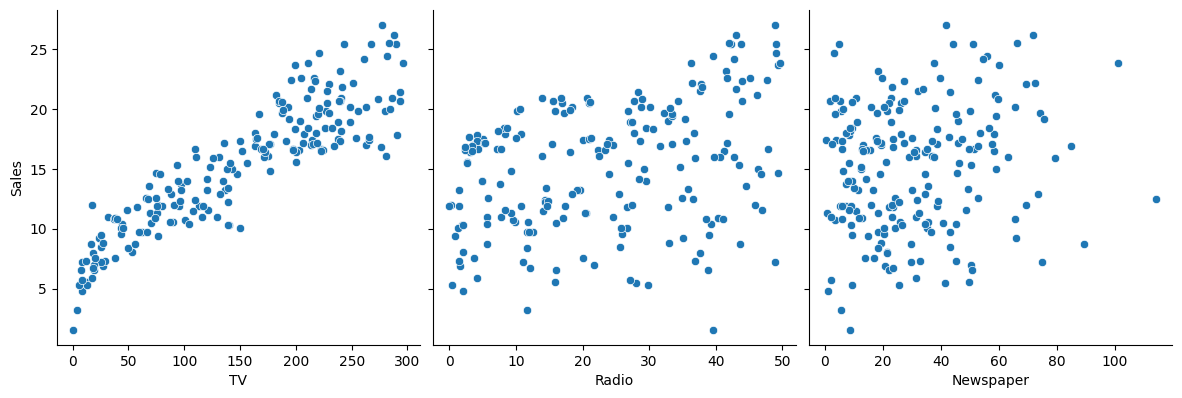

In [ ]:
sns.pairplot(dt_ad, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size = 4, aspect = 1)

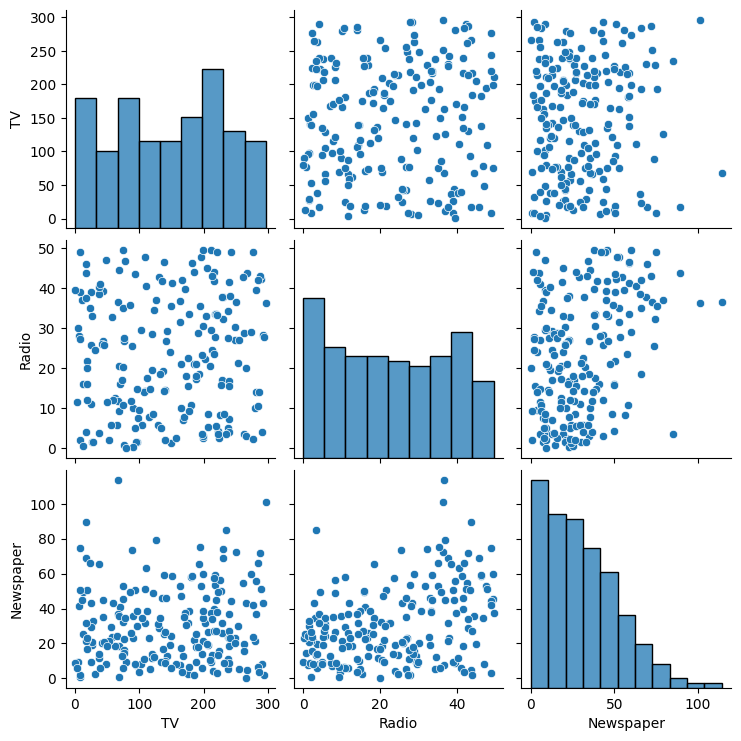

In [ ]:
sns.pairplot(dt_ad[['TV','Radio','Newspaper']])

In [ ]:
#he correlation between different variables.

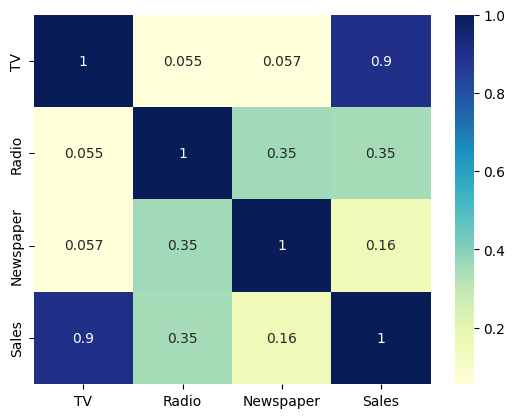

In [ ]:
sns.heatmap(dt_ad.corr(), cmap="YlGnBu", annot = True)
plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

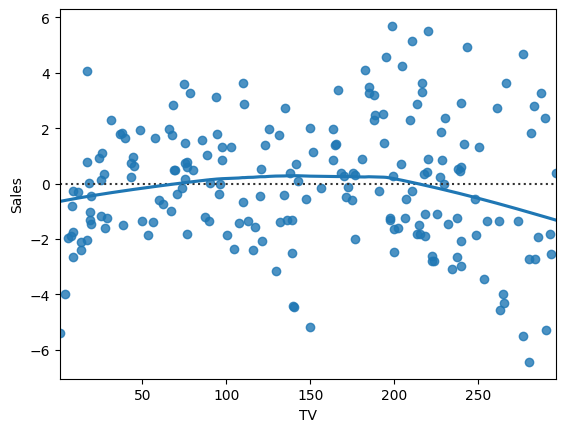

In [ ]:
sns.residplot(x = dt_ad['TV'], y = dt_ad["Sales"], lowess = True)

In [ ]:
#using scikit-learn linear regression model
X = dt_ad['TV']
y = dt_ad['Sales']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
import statsmodels.api as sm

X_train_sm=sm.add_constant(X_train)
sk=sm.OLS(y_train,X_train_sm).fit()

In [ ]:
sk.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
sk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.52e-52
Time:                        13:38:49   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

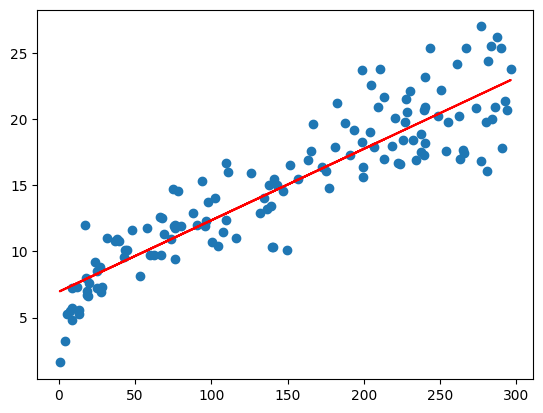

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


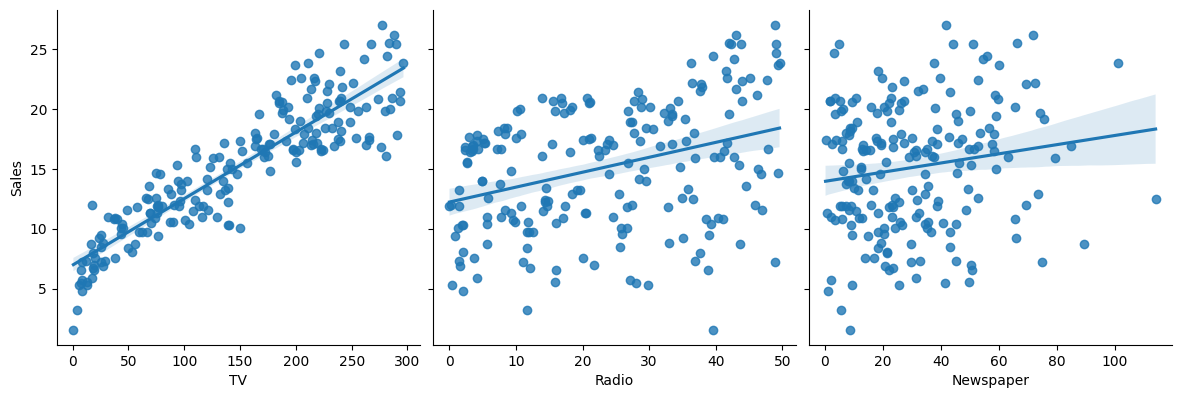

In [ ]:
sns.pairplot(dt_ad, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=4, aspect = 1, kind='reg')

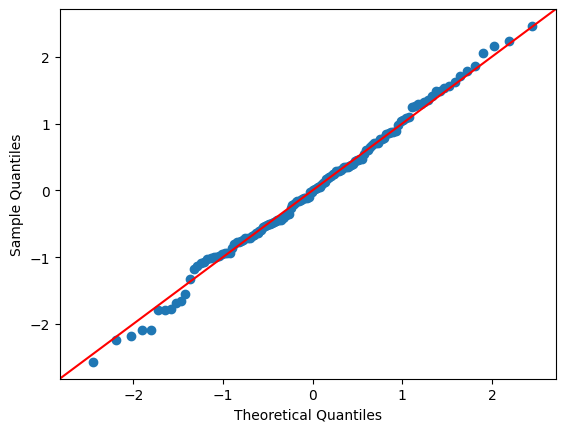

In [ ]:
Ststsmodels_residual = sk.resid
ax = sm.qqplot(Ststsmodels_residual, fit = True, line = "45")

In [ ]:
# print the confidence intervals for the model coefficients

In [ ]:
sk.conf_int()

,0,1
const,6.188252,7.709114
TV,0.050183,0.058908


In [ ]:
# print the p-values for the model coefficients

In [ ]:
sk.pvalues

const    3.456118e-38
TV       1.516345e-52
dtype: float64

In [ ]:
y_train_pred = sk.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-60-f6bd2f4e3b5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


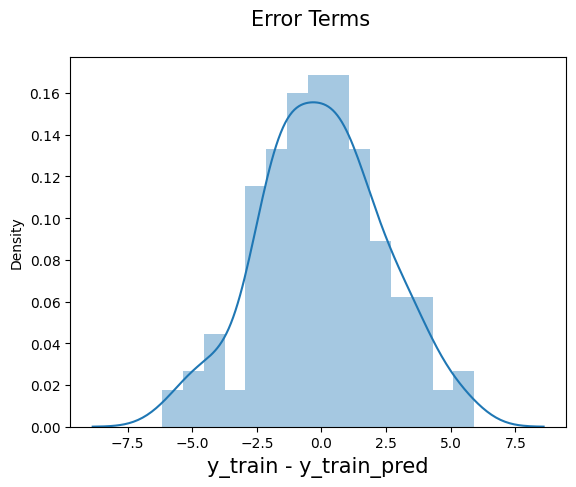

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [ ]:
#Predictions on the Test Set

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()


126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

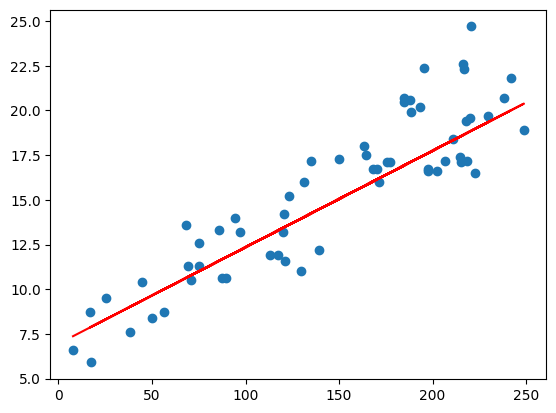

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [ ]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [ ]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.7921031601245662

In [ ]:
regr.score(X_train, y_train)

0.8157933136480389

In [ ]:
print(regr.intercept_)
print(regr.coef_)

[6.9486832]
[[0.05454575]]


In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6480589869746525
Mean Squared Error: 4.077556371826948
Root Mean Squared Error: 2.019296008966231


In [ ]:
def LinearRegressionOLS(X, y):
    X= np.array(X)
    y= np.array(y)
    theta1 = ((X*y).mean()-X.mean()*y.mean())/((X**2).mean()- (X.mean()**2))
    theta0 =y.mean() - theta1*X.mean()
    return (theta0, theta1)

In [ ]:
result = LinearRegressionOLS(X,y)
result

(6.974821488229898, 0.055464770469558826)

In [ ]:
def LinearRegressionNormalEquation(X, y):
    X1= np.array(X)
    #y= np.array(y)
    n=len(X1)
    X0 = np.ones((n,1))
    X1 = np.reshape(X1,(n,1))
    X=np.append(X0,X1, axis= 1)
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [ ]:
result = LinearRegressionNormalEquation(X,y)
result

array([[6.97482149],
       [0.05546477]])

In [ ]:
def LinearRegressionGradientDescent(X, y, learning_rate,epochs):
    X1=np.array(X)
    n0=len(X1)
    X0 = np.ones((n0,1))
    X1 = np.reshape(X1,(n0,1))
    X=np.append(X0,X1, axis= 1)
    y = np.array(y)
    m,n = np.shape(X)
    theta = np.random.rand(2)

    for i in range(0,epochs):
        hypothesis = X @ theta
        loss = hypothesis - y
        cost = (2/m)*np.sum(loss**2)
        theta = theta - ((learning_rate/m) * np.sum(X.T @ loss ) )
        print("theta  :",theta,"   cost  :",cost)
    return theta

In [ ]:
result = LinearRegressionGradientDescent(X, y, 0.0001,5)


theta  : [-318.20363797 -317.35514761]    cost  : 7002220.004961056
theta  : [138844.04451618 138844.89300655]    cost  : 1178985154855.201
theta  : [-60721209.62757292 -60721208.77908255]    cost  : 2.255564377870255e+17
theta  : [2.65553056e+10 2.65553056e+10]    cost  : 4.313966128686317e+22
theta  : [-1.16134753e+13 -1.16134753e+13]    cost  : 8.250846762996658e+27


In [ ]:
result

array([-1.16134753e+13, -1.16134753e+13])

In [ ]:
def MultiLinearRegressionOLS(X, y):
    return (theta0, theta1, theta2)

In [ ]:
def MultiLinearRegressionNormalEquation(X, y):
    X1= np.array(X)
    y= np.array(y)
    n=len(X1)
    X0 = np.ones((n,1))
    #X1 = np.reshape(X1,(n,1))
    X=np.append(X0,X1, axis= 1)
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [ ]:
result = MultiLinearRegressionNormalEquation(X,y)

In [ ]:
result

array([[6.97482149],
       [0.05546477]])

<ipython-input-95-3618ae0949fa>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dt_ad.corr(), dtype=np.bool)


<Axes: >

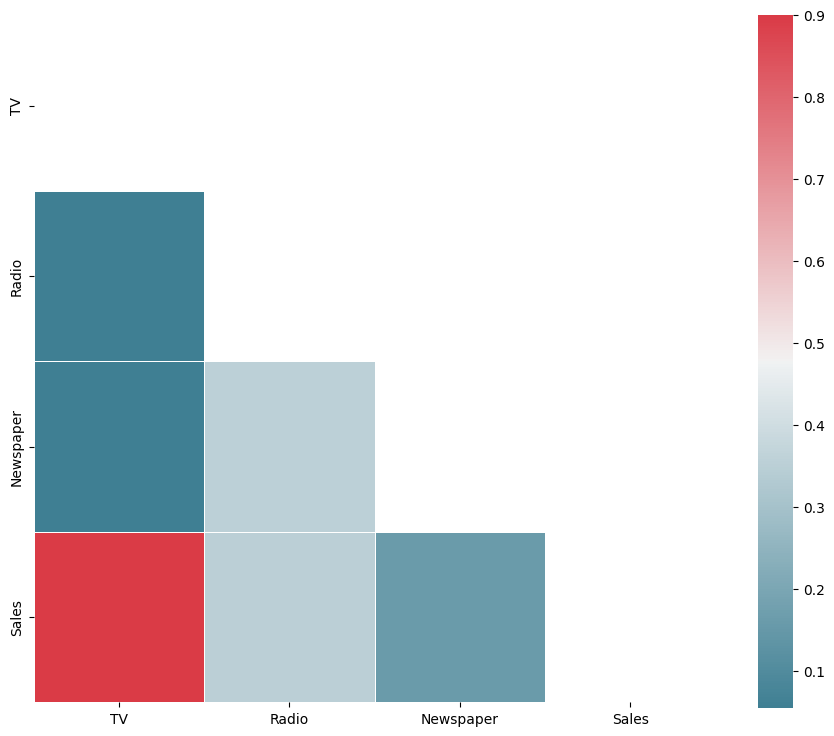

In [ ]:
mask = np.zeros_like(dt_ad.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(dt_ad.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)


In [ ]:
# Visualize the relationship using scatterplot

Text(0.5, 1.0, 'Radio vs TV')

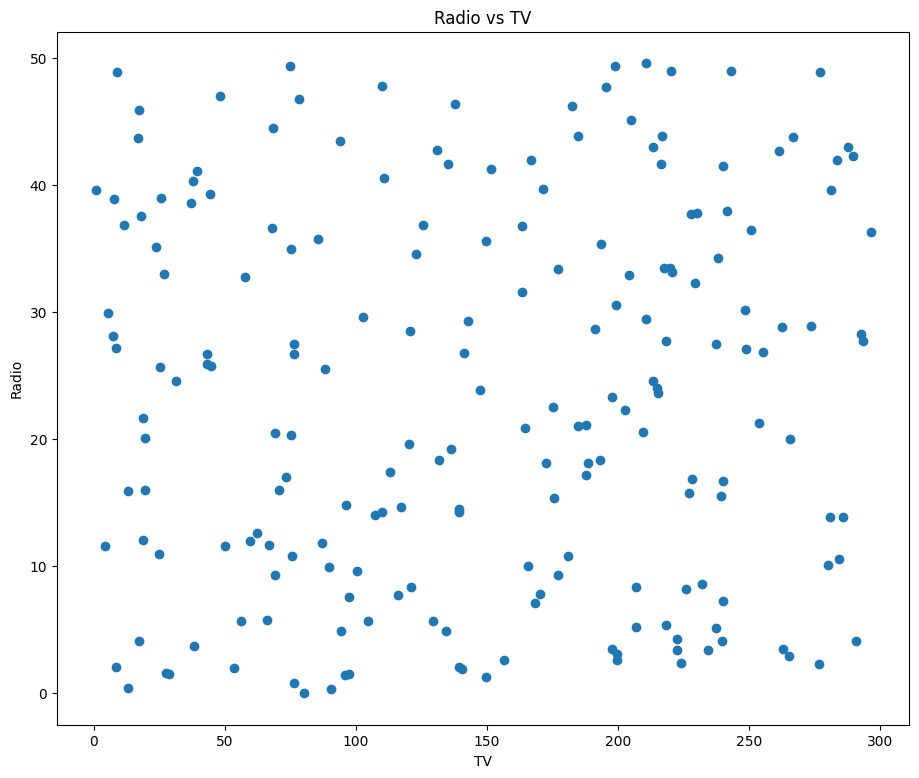

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(dt_ad["TV"], dt_ad["Radio"])
plt.xlabel("TV")
plt.ylabel("Radio")
plt.title("Radio vs TV")

Text(0.5, 1.0, 'Newspaper vs Radio')

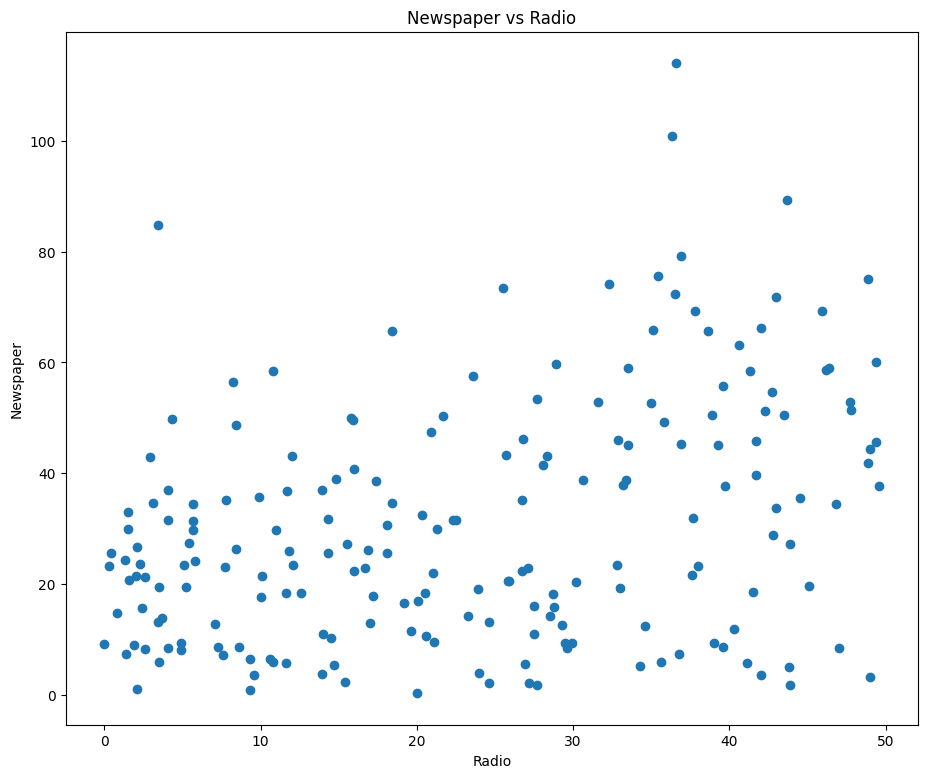

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(dt_ad["Radio"], dt_ad["Newspaper"])
plt.xlabel("Radio")
plt.ylabel("Newspaper")
plt.title("Newspaper vs Radio")

Text(0.5, 1.0, 'Radio vs Radio')

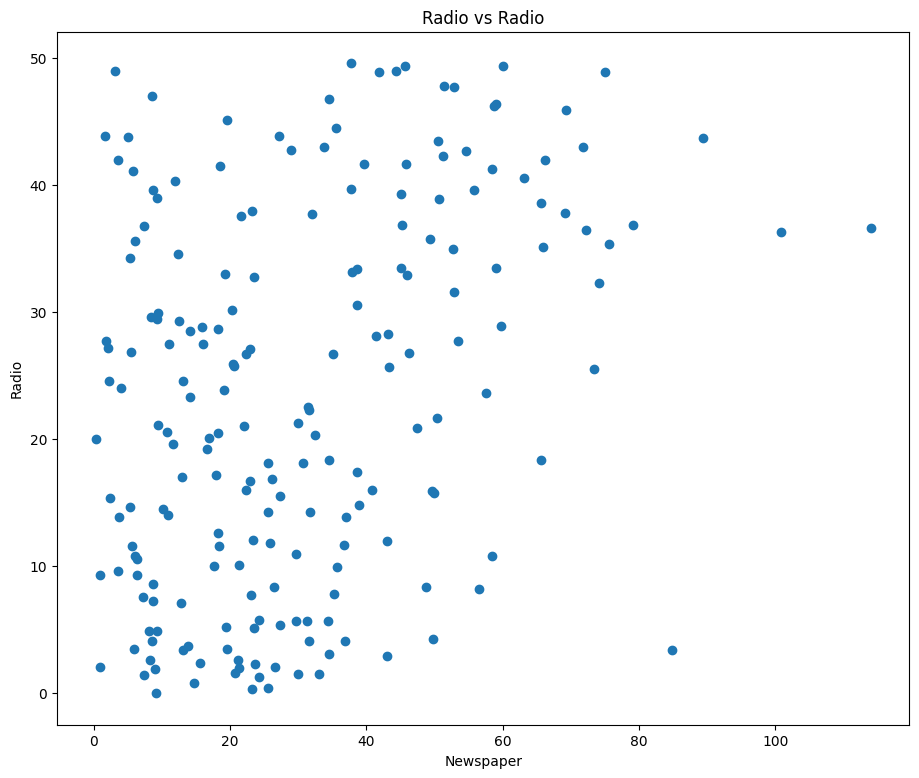

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(dt_ad["Newspaper"], dt_ad["Radio"])
plt.xlabel("Newspaper")
plt.ylabel("Radio")
plt.title("Radio vs Radio")


In [ ]:
# Separate the predictor and the target variable

In [ ]:
x = dt_ad.drop("Sales", axis = 1)
y = dt_ad["Sales"]

print(f"==x (predictors)==\nSize: {x.shape}\n{x.head()}\n Data Type: {type(x.head())} ")
print(f"\n==y (target)==\nSize: {y.shape}\n{y.head()}\n{type(y.head())}")

==x (predictors)==
Size: (200, 3)
      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
 Data Type: <class 'pandas.core.frame.DataFrame'> 

==y (target)==
Size: (200,)
0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


In [ ]:
# Train-Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (150, 3)
y_train size: (150,)

x_test size: (50, 3)
y_test size: (50,)


## *Initialize dataframe that will store the results*

In [ ]:
dt_ad_results = pd.DataFrame(columns = ["Predictor/s", "R2", "MAE", "MSE", "RMSE", "Cross-Val Mean"])

# Linear Regression

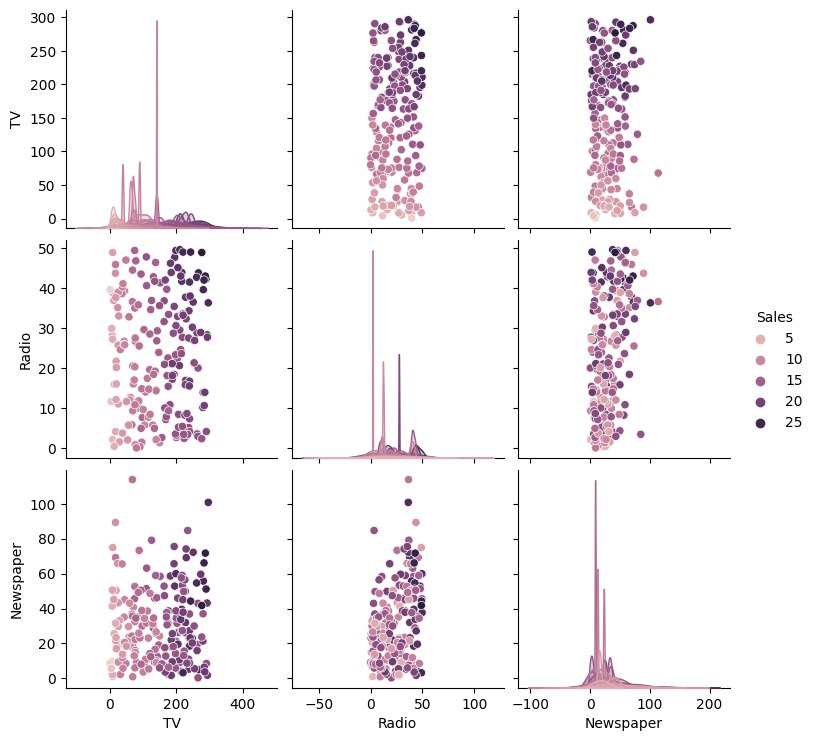

In [ ]:
sns.pairplot(dt_ad, hue='Sales')



<Axes: >

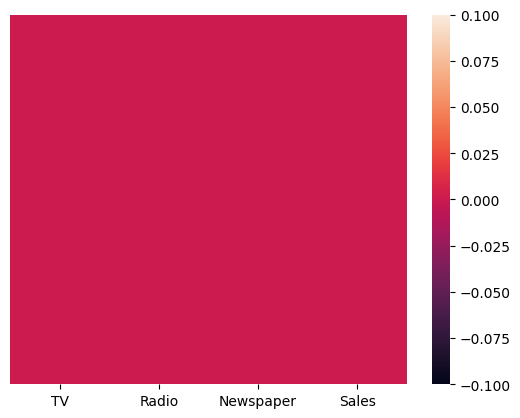

In [ ]:
sns.heatmap(dt_ad.isnull(), yticklabels=False)

In [ ]:
feature_columns = ['TV','Radio','Newspaper']
X = dt_ad[feature_columns]
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
Y = dt_ad['Sales']
Y = dt_ad.Sales
Y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [ ]:
true = [100,50,30,20]
pred = [90,50,50,30]